In [91]:
#Importing all libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing dataset

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/modeldata/train.csv")
df

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511
...,...,...,...,...,...,...,...,...,...,...,...
524159,524159,0.796831,-13.405645,0.023500,0.504738,0.000001,0.191414,0.668079,135528.3189,0.004400,117.83118
524160,524160,0.975000,-12.132914,0.077379,0.069462,0.262320,0.124818,0.288946,240709.3918,0.447067,89.02681
524161,524161,0.542958,-1.357000,0.071390,0.168978,0.000001,0.313912,0.586868,344858.2321,0.718800,90.75885
524162,524162,0.637192,-7.411331,0.113086,0.000005,0.061946,0.287963,0.368891,322710.3187,0.944267,140.63235


# Reviewing the data



In [93]:
print("-----First five rows-----")
print(df.head())
print("\n-----Last Five rows-----\n")
print(df.tail())

print("\n-----Info of The Data-----\n")
print(df.info())

-----First five rows-----
   id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0   0     0.603610      -7.636942      0.023500         0.000005   
1   1     0.639451     -16.267598      0.071520         0.444929   
2   2     0.514538     -15.953575      0.110715         0.173699   
3   3     0.734463      -1.357000      0.052965         0.001651   
4   4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.453814                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  BeatsPerMinute  
0  0.826267       147.53020  
1  0.145400       136.15963  


In [94]:
print(df.isnull().sum())

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64


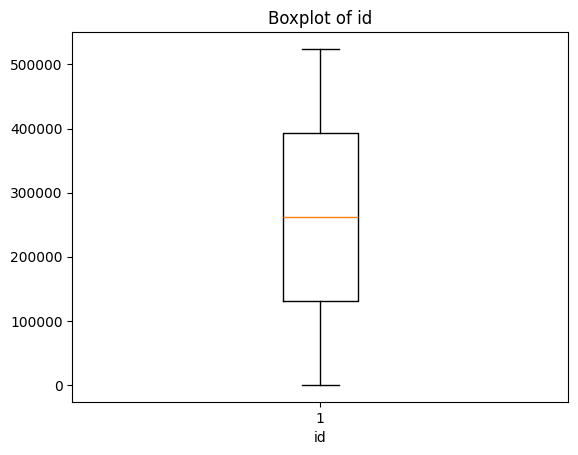

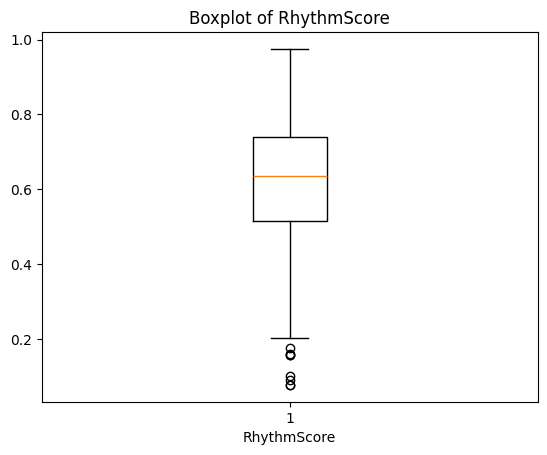

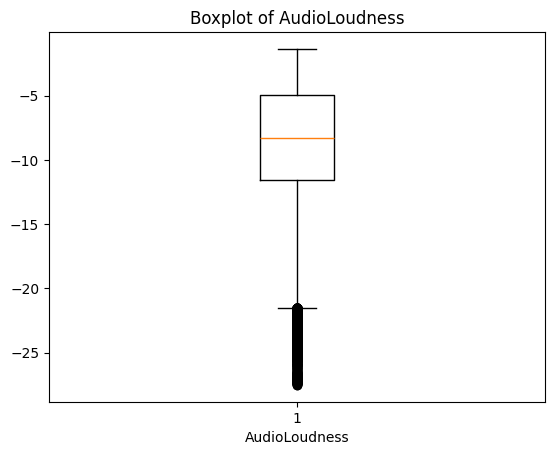

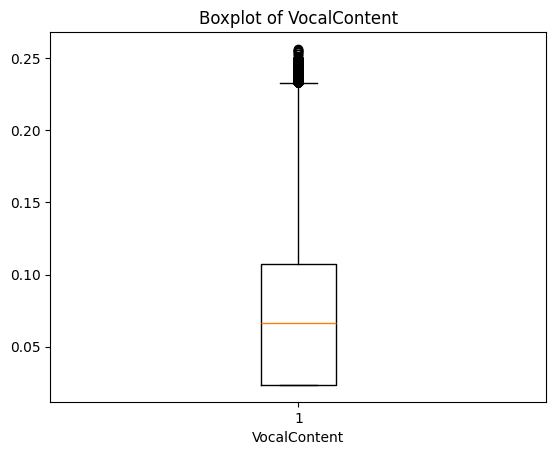

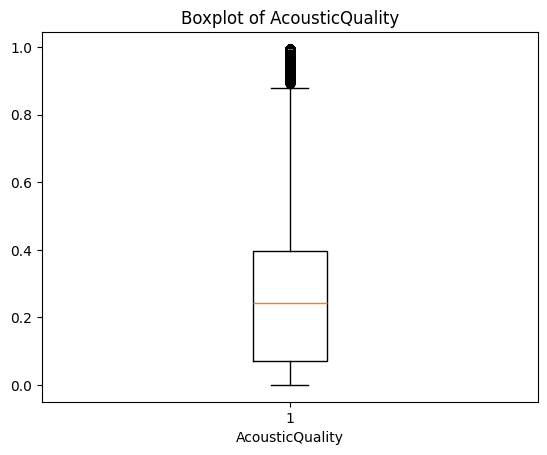

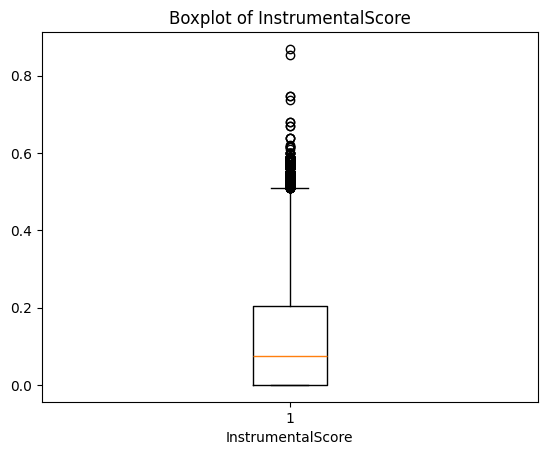

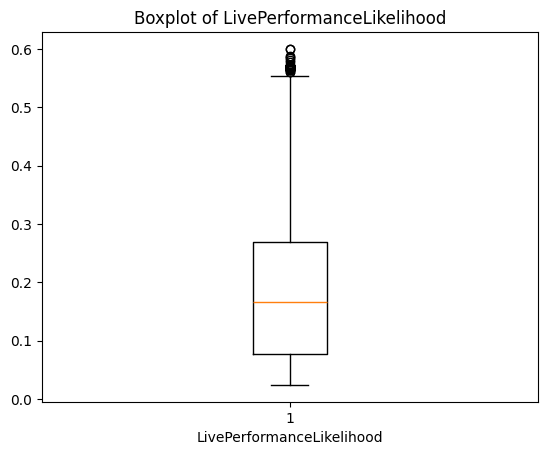

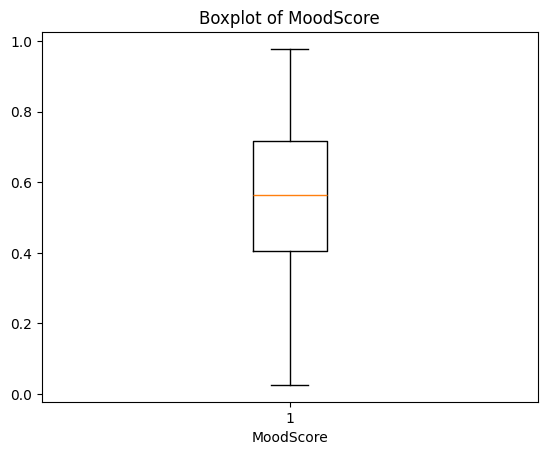

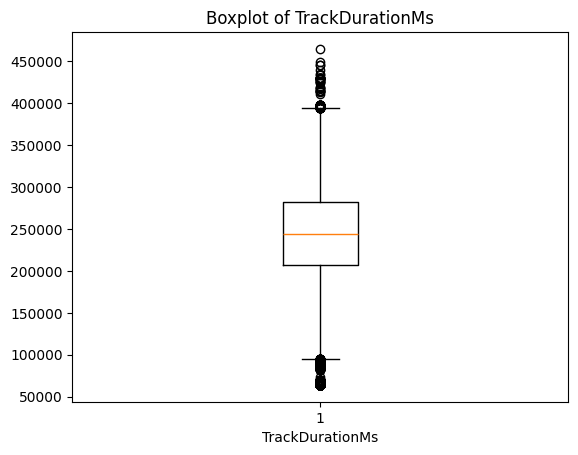

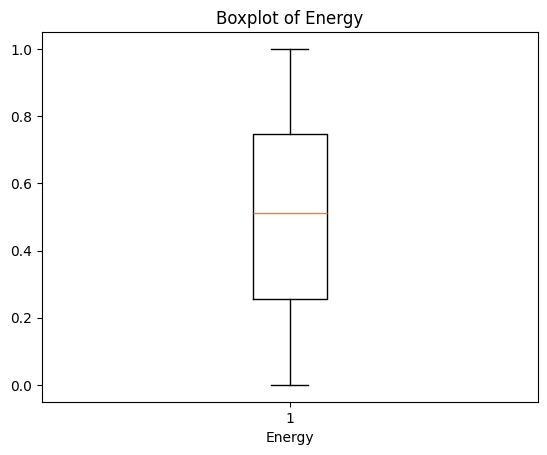

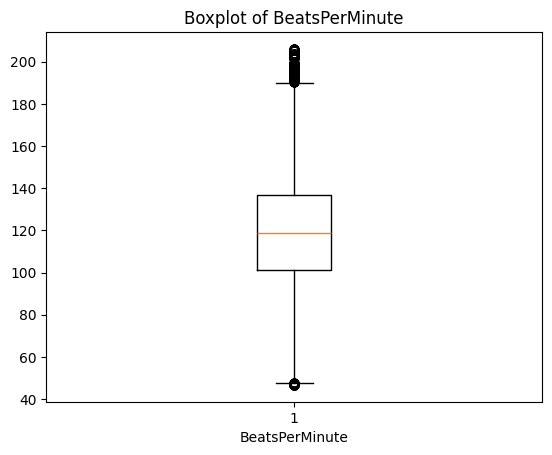

In [95]:
import matplotlib.pyplot as plt


for col in df.columns:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [96]:
for column in df:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1

  #Bounds:
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  outliers = df[(df[column]>upper) | (df[column]<lower)]

  df = df[(df[column]<upper) & (df[column]>lower)]

df

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511
...,...,...,...,...,...,...,...,...,...,...,...
524159,524159,0.796831,-13.405645,0.023500,0.504738,0.000001,0.191414,0.668079,135528.3189,0.004400,117.83118
524160,524160,0.975000,-12.132914,0.077379,0.069462,0.262320,0.124818,0.288946,240709.3918,0.447067,89.02681
524161,524161,0.542958,-1.357000,0.071390,0.168978,0.000001,0.313912,0.586868,344858.2321,0.718800,90.75885
524162,524162,0.637192,-7.411331,0.113086,0.000005,0.061946,0.287963,0.368891,322710.3187,0.944267,140.63235


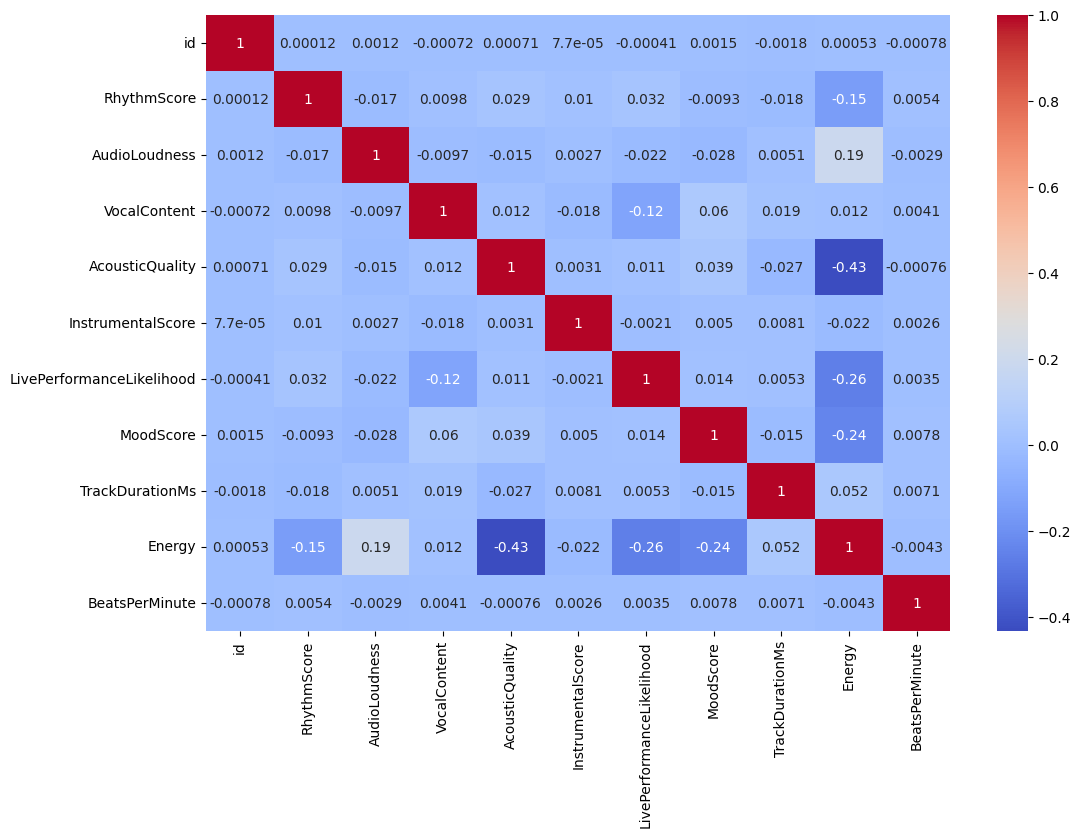

In [97]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [98]:
# df['AudioLoudness'] = df['AudioLoudness'] - df['AudioLoudness'].min() + 1
# df['TrackDurationM']=df['TrackDurationMs']/(1000*60)
# df=df.drop('TrackDurationMs',axis=1)
# df.head()

# Training model using random Forest

In [99]:
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np

# X = df.drop('BeatsPerMinute', axis=1)
# y = df['BeatsPerMinute']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# rf_param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [3, 6, 9, None],
#     'min_samples_split': [2, 5, 10],
# }

# rf_grid = GridSearchCV(
#     RandomForestRegressor(random_state=42, n_jobs=-1),
#     param_grid=rf_param_grid,
#     cv=5,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1
# )
# rf_grid.fit(X_train, y_train)

# best_rf = rf_grid.best_estimator_
# rf_pred = best_rf.predict(X_test)
# rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

# print("Best Random Forest Parameters:", rf_grid.best_params_)
# print("Random Forest Test RMSE:", rf_rmse)


In [100]:
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np

# X = df.drop('BeatsPerMinute', axis=1)
# y = df['BeatsPerMinute']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# gb_param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2]
# }

# gb_grid = GridSearchCV(
#     GradientBoostingRegressor(random_state=42),
#     param_grid=gb_param_grid,
#     cv=5,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,
#     verbose=1
# )

# gb_grid.fit(X_train, y_train)

# best_gb = gb_grid.best_estimator_
# gb_pred = best_gb.predict(X_test)
# gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))

# print("Best Gradient Boosting Parameters:", gb_grid.best_params_)
# print("Gradient Boosting Test RMSE:", gb_rmse)


In [101]:

# from sklearn.model_selection import GridSearchCV, train_test_split
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np

# X = df.drop('BeatsPerMinute', axis=1)
# y = df['BeatsPerMinute']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# xgb_param_grid = {
#     'n_estimators': [50, 100,150],
#     'max_depth': [3, 5, 7,9],
#     'learning_rate': [0.01, 0.1, 0.2,0.3]
# }

# xgb_grid = GridSearchCV(
#     XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror'),
#     param_grid=xgb_param_grid,
#     cv=5,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,
#     verbose=1
# )

# xgb_grid.fit(X_train, y_train)

# best_xgb = xgb_grid.best_estimator_
# xgb_pred = best_xgb.predict(X_test)
# xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

# print("Best XGBoost Parameters:", xgb_grid.best_params_)
# print("XGBoost Test RMSE:", xgb_rmse)

# Fitting 5 folds for each of 48 candidates, totalling 240 fits
# Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150}
# XGBoost Test RMSE: 26.070345180983

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

X = df.drop('BeatsPerMinute', axis=1)
y = df['BeatsPerMinute']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(
    n_estimators=100,
    max_depth=9,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [103]:
from sklearn.metrics import mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)
# RMSE: 26.066893881422686 while using feature

R² Score: 0.000855333955522064
MAE: 21.010474379936266
RMSE: 26.066683387943847


In [104]:
df_new = pd.read_csv('/kaggle/input/model-data/test2.csv')
df_new

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,524164,0.410013,-16.794967,0.023500,0.232910,0.012689,0.271585,0.664321,302901.5498,0.424867
1,524165,0.463071,-1.357000,0.141818,0.057725,0.257942,0.097624,0.829552,221995.6643,0.846000
2,524166,0.686569,-3.368928,0.167851,0.287823,0.210915,0.325909,0.304978,357724.0127,0.134067
3,524167,0.885793,-5.598049,0.118488,0.000005,0.376906,0.134435,0.487740,271790.3989,0.316467
4,524168,0.637391,-7.068160,0.126099,0.539073,0.068950,0.024300,0.591248,277728.5383,0.481067
...,...,...,...,...,...,...,...,...,...,...
174717,698881,0.332976,-9.654381,0.155402,0.143983,0.351255,0.307580,0.679634,255610.4189,0.427533
174718,698882,0.828106,-11.143536,0.121822,0.451146,0.096678,0.140123,0.274977,241204.9403,0.098333
174719,698883,0.569334,-4.253765,0.137968,0.246896,0.079425,0.102919,0.569331,127422.2955,0.193200
174720,698884,0.764595,-11.088025,0.055225,0.430128,0.006836,0.105584,0.653928,171586.5838,0.067467


In [105]:
# df_new['AudioLoudness'] = df_new['AudioLoudness'] - df_new['AudioLoudness'].min() + 1
# df_new['TrackDurationM']=df_new['TrackDurationMs']/(1000*60)
# df_new=df_new.drop('TrackDurationMs',axis=1)
# df_new.head()

In [106]:

y_pred_new = model.predict(df_new)
print(y_pred_new[:10])


[119.1696659  116.96965593 120.72701023 119.12350762 119.7735836
 120.60133841 117.35706854 118.89832418 119.30496239 119.47092988]


In [107]:
sample = pd.read_csv("/kaggle/input/model-data/sample_submission.csv")

sample["BeatsPerMinute"] = y_pred_new

sample.to_csv("/kaggle/working/submission4.csv", index=False)
print("✅ Submission file saved in correct format!")

✅ Submission file saved in correct format!
